In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st 



In [3]:
data_video= pd.read_csv('/datasets/games.csv')

In [4]:
data_video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
name_games=[]
for game in data_video.columns:
    name_lowered=game.lower()
    name_games.append(name_lowered)
data_video.columns= name_games   
print (data_video.columns)  



Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Explicacion :Se realiza el cambio a minusculas de los nombres de las columnas

In [6]:
print(data_video[data_video['name'].isna()])
print(data_video[data_video['genre'].isna()])
print(data_video[data_video['year_of_release'].isna()].head(5))
print(data_video[data_video['rating'].isna()].head(5))
print(data_video[data_video['critic_score'].isna()].head(5))


      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
                           name platform  year_of_release     genre  na_sales  \
183             Madden NFL 2004      PS2              NaN    Sports      4.26   
377            FIFA Soccer 2004      PS2              NaN    S

Explicacion:En este paso validamos los datos ausentes, para determinar el paso a seguri para que no se afecte el analisis de datos

In [7]:
data_video['name']=data_video['name'].fillna('uknown')
data_video['genre']=data_video['genre'].fillna('uknown')
data_video['critic_score']=data_video['critic_score'].fillna(999)
data_video['user_score']=data_video['user_score'].fillna(999)
data_video['rating']=data_video['rating'].fillna('uknown')




Conclusion:Los datos ausentes los llenamos conla palabra desconocidos porque no tenemos la informacion y para no alterar los datos

In [8]:
new_filter=data_video.query("user_score=='tbd'")
new_filter_tbd=new_filter.groupby(['genre'])['platform'].count()
print(new_filter_tbd.head(20))

genre
Action          376
Adventure       159
Fighting         39
Misc            449
Platform        139
Puzzle          211
Racing          233
Role-Playing     30
Shooter          99
Simulation      237
Sports          413
Strategy         39
Name: platform, dtype: int64


Explicacion:Se filtro por cada genero para identificar cuales tienen tbd, a determinar

In [9]:
data_video['ventas_totales']=data_video['na_sales']+ data_video['eu_sales']+data_video['jp_sales']+ data_video['other_sales']
print(data_video.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
 11  ventas_totales   16715 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB
None


Comentarios :Se ajusta la columna con valores ausentes en 'critic_score' 

Se crea la columna ventas totales

In [10]:
group_year_release=data_video.groupby(['year_of_release'])['platform'].count()
group_year_release=group_year_release.reset_index()
group_year_release=group_year_release.sort_values(by='year_of_release',ascending=False)
print(group_year_release.reset_index(drop=True))


    year_of_release  platform
0            2016.0       502
1            2015.0       606
2            2014.0       581
3            2013.0       544
4            2012.0       653
5            2011.0      1136
6            2010.0      1255
7            2009.0      1426
8            2008.0      1427
9            2007.0      1197
10           2006.0      1006
11           2005.0       939
12           2004.0       762
13           2003.0       775
14           2002.0       829
15           2001.0       482
16           2000.0       350
17           1999.0       338
18           1998.0       379
19           1997.0       289
20           1996.0       263
21           1995.0       219
22           1994.0       121
23           1993.0        62
24           1992.0        43
25           1991.0        41
26           1990.0        16
27           1989.0        17
28           1988.0        15
29           1987.0        16
30           1986.0        21
31           1985.0        14
32        

Explicacion:Se agrupan los juegos que fueron lanzados por years

In [11]:
sales_platform= data_video.groupby(['platform'])['ventas_totales'].sum()
sales_platform=sales_platform.sort_values(ascending=False)
total_sales_platform=sales_platform.iloc[0:10]
total_sales_platform=total_sales_platform.reset_index()
print(total_sales_platform.head(10))

  platform  ventas_totales
0      PS2         1255.77
1     X360          971.42
2      PS3          939.65
3      Wii          907.51
4       DS          806.12
5       PS          730.86
6      GBA          317.85
7      PS4          314.14
8      PSP          294.05
9       PC          259.52


Explicacion:Se validaron las 10 plataformas con mayores ventas en la historia.

In [12]:
sales_platform_year=data_video.groupby(['year_of_release','platform',])['ventas_totales'].sum()
sales_platform_year=sales_platform_year.reset_index()
new_sales_year=pd.merge(total_sales_platform,sales_platform_year,on=(['platform']),how='left')
platform_total_year=new_sales_year.drop('ventas_totales_x', axis='columns')
print(platform_total_year.head(20))


   platform  year_of_release  ventas_totales_y
0       PS2           2000.0             39.17
1       PS2           2001.0            166.43
2       PS2           2002.0            205.38
3       PS2           2003.0            184.31
4       PS2           2004.0            211.81
5       PS2           2005.0            160.66
6       PS2           2006.0            103.42
7       PS2           2007.0             75.99
8       PS2           2008.0             53.90
9       PS2           2009.0             26.40
10      PS2           2010.0              5.64
11      PS2           2011.0              0.45
12     X360           2005.0              8.25
13     X360           2006.0             51.62
14     X360           2007.0             95.41
15     X360           2008.0            135.26
16     X360           2009.0            120.29
17     X360           2010.0            170.03
18     X360           2011.0            143.84
19     X360           2012.0             99.74


Explicacion:Se arrojaron los datos de las ventas de las plataformas con mayor desempeno por year

In [13]:
fecha_inicio=data_video.groupby(['platform'])['year_of_release'].min()
fecha_inicio=fecha_inicio.reset_index()
ultimo_lanzamiento=data_video.groupby(['platform'])['year_of_release'].max()
ultimo_lanzamiento=ultimo_lanzamiento.reset_index()
year_ultimate=pd.merge(fecha_inicio,ultimo_lanzamiento,on='platform',suffixes=['_first', '_last'])
year_ultimate['year_vigencia']=year_ultimate['year_of_release_last']-year_ultimate['year_of_release_first']
vigencia_year_ultimate=year_ultimate.sort_values(by='year_vigencia',ascending=False)
vigencia_year_ultimate= vigencia_year_ultimate.reset_index(drop=True)
print(vigencia_year_ultimate)


   platform  year_of_release_first  year_of_release_last  year_vigencia
0        PC                 1985.0                2016.0           31.0
1        DS                 1985.0                2013.0           28.0
2        GB                 1988.0                2001.0           13.0
3      X360                 2005.0                2016.0           11.0
4       PSP                 2004.0                2015.0           11.0
5       PS2                 2000.0                2011.0           11.0
6       NES                 1983.0                1994.0           11.0
7        DC                 1998.0                2008.0           10.0
8       Wii                 2006.0                2016.0           10.0
9       PS3                 2006.0                2016.0           10.0
10     2600                 1980.0                1989.0            9.0
11     SNES                 1990.0                1999.0            9.0
12       PS                 1994.0                2003.0        

Explicacion:Verificamos la fecha de vigencia con la que contaba la plataforma y el periodo en el que fueron vendidas

In [14]:
ultimate_sales_platform=pd.merge(vigencia_year_ultimate,sales_platform,on='platform')
sales_platform_last=ultimate_sales_platform.sort_values(by='ventas_totales',ascending=False)
sales_platform_last=sales_platform_last.reset_index(drop=True)
columns_platform_sales_vigencia=['platform','year_of_release_last','year_vigencia','ventas_totales']
platform_sales_last_vigencia=sales_platform_last[columns_platform_sales_vigencia]
print(platform_sales_last_vigencia)


   platform  year_of_release_last  year_vigencia  ventas_totales
0       PS2                2011.0           11.0         1255.77
1      X360                2016.0           11.0          971.42
2       PS3                2016.0           10.0          939.65
3       Wii                2016.0           10.0          907.51
4        DS                2013.0           28.0          806.12
5        PS                2003.0            9.0          730.86
6       GBA                2007.0            7.0          317.85
7       PS4                2016.0            3.0          314.14
8       PSP                2015.0           11.0          294.05
9        PC                2016.0           31.0          259.52
10      3DS                2016.0            5.0          259.00
11       XB                2008.0            8.0          257.74
12       GB                2001.0           13.0          255.46
13      NES                1994.0           11.0          251.05
14      N64              

Explicacion:De las plataformas mas vendidas se analizo su vigencia

In [15]:
group_year_new=data_video.groupby(['platform','year_of_release'])['ventas_totales'].sum()
group_year_new=group_year_new.reset_index()
print(group_year_new.sort_values(by='year_of_release',ascending=False).head(30))


    platform  year_of_release  ventas_totales
237     XOne           2016.0           26.15
224     X360           2016.0            1.52
212     WiiU           2016.0            4.60
207      Wii           2016.0            0.18
156      PS4           2016.0           69.25
17       3DS           2016.0           15.14
152      PS3           2016.0            3.60
174      PSV           2016.0            4.25
118       PC           2016.0            5.25
211     WiiU           2015.0           16.35
206      Wii           2015.0            1.14
16       3DS           2015.0           27.78
173      PSV           2015.0            6.25
117       PC           2015.0            8.52
151      PS3           2015.0           16.82
155      PS4           2015.0          118.90
168      PSP           2015.0            0.12
236     XOne           2015.0           60.14
223     X360           2015.0           11.96
116       PC           2014.0           13.28
150      PS3           2014.0     

Explicacion:De las plataformas que se vendieron, se analiza cuales no se venden actualmente

In [16]:
last_group=data_video.groupby(['platform','year_of_release'])['ventas_totales'].sum()
last_group=last_group.reset_index()
lead_platform=data_video.groupby(['platform'])['year_of_release'].max()
lead_platform=lead_platform.reset_index()
lead_ultimate_sales=pd.merge(lead_platform,last_group,on=['platform','year_of_release'],how='left')
lead_sales_platform_last=lead_ultimate_sales.sort_values(by='year_of_release',ascending=False)
print(lead_sales_platform_last.reset_index(drop=True))


   platform  year_of_release  ventas_totales
0      XOne           2016.0           26.15
1       3DS           2016.0           15.14
2      X360           2016.0            1.52
3      WiiU           2016.0            4.60
4       Wii           2016.0            0.18
5       PSV           2016.0            4.25
6        PC           2016.0            5.25
7       PS4           2016.0           69.25
8       PS3           2016.0            3.60
9       PSP           2015.0            0.12
10       DS           2013.0            1.54
11      PS2           2011.0            0.45
12       DC           2008.0            0.04
13       XB           2008.0            0.18
14      GBA           2007.0            3.40
15       GC           2007.0            0.27
16       PS           2003.0            2.07
17      N64           2002.0            0.08
18       WS           2001.0            0.28
19       GB           2001.0            9.24
20      SAT           1999.0            0.09
21     SNE

Explicacion:Se revisaron los lideres en ventasd en los ultimos years

In [17]:
filter_year=data_video.query('year_of_release>=2010')
group_year_new=filter_year.groupby(['platform','year_of_release'])['ventas_totales'].sum()
group_year_new=group_year_new.reset_index()
group_year_new=group_year_new.sort_values(by='year_of_release',ascending=False)
print(group_year_new.reset_index(drop=True).head(55))

   platform  year_of_release  ventas_totales
0      XOne           2016.0           26.15
1      X360           2016.0            1.52
2      WiiU           2016.0            4.60
3       PS4           2016.0           69.25
4        PC           2016.0            5.25
5       Wii           2016.0            0.18
6       PS3           2016.0            3.60
7       3DS           2016.0           15.14
8       PSV           2016.0            4.25
9       Wii           2015.0            1.14
10     XOne           2015.0           60.14
11      PS3           2015.0           16.82
12      PSP           2015.0            0.12
13       PC           2015.0            8.52
14      3DS           2015.0           27.78
15      PSV           2015.0            6.25
16      PS4           2015.0          118.90
17     WiiU           2015.0           16.35
18     X360           2015.0           11.96
19      PSV           2014.0           11.90
20      Wii           2014.0            3.75
21      PS

Explicacion:de las plataformas vendidas se utilizan los datos para sacar un pronostico de ventas para el 2017

In [18]:
def era_sales(sales):
    year = sales['year_of_release']
    na_sales = sales['na_sales']
    eu_sales = sales['eu_sales']
    jp_sales = sales['jp_sales']
    other_sales=sales['other_sales']
       
    total_sales = na_sales + eu_sales + jp_sales + other_sales
    
    year = sales['year_of_release']
    if year < 2005:
        if total_sales < 1:
            return 'retro'
        else:
            return 'classic'
    if year < 2012:
        if total_sales < 1:
            return 'modern'
        else:
            return 'classic'
    if year >= 2012:
        if total_sales < 1:
            return 'recent'
        else:
             return 'big hit'
    else:
        return 'unknown'        
data_video['game_category'] = data_video.apply(era_sales, axis=1)

  
print(data_video.sample(5, random_state=321))

                                             name platform  year_of_release  \
5345    High School Musical 3: Senior Year DANCE!      PS2           2008.0   
5070                           The Golden Compass      PSP              NaN   
11173                           Petz: Saddle Club      PSP           2009.0   
16254              Smiley World: Island Challenge       DS           2009.0   
5540   Shin Nippon Pro Wrestling: Toukon Retsuden       PS           1995.0   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
5345         Misc      0.17      0.13       0.0         0.04         999.0   
5070       Action      0.11      0.16       0.0         0.10          28.0   
11173  Simulation      0.08      0.00       0.0         0.01         999.0   
16254      Puzzle      0.01      0.00       0.0         0.00         999.0   
5540     Fighting      0.00      0.00       0.3         0.02         999.0   

      user_score  rating  ventas_totales game_category  

Explicacion: Se categorizo de acuerdo al nivel de ventas y al year por lanzamiento por juegos.

<AxesSubplot:xlabel='ventas_totales'>

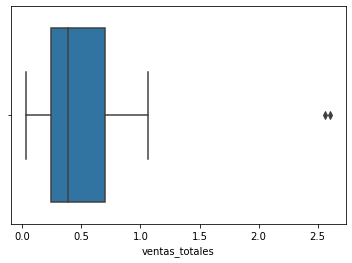

In [19]:
box_platform=data_video.groupby(['platform'])['ventas_totales'].mean()
sns.boxplot(x=box_platform)


Explicacion:Los datos tienen una media de 0.4, y un valor minimo de 0.3 y un valor maximo de 0.7 y unos valorres atipicos de 2.5

                 year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
year_of_release         1.000000 -0.053523  0.020449  0.105950     0.002588   
na_sales               -0.053523  1.000000  0.826092  0.376572     0.872488   
eu_sales                0.020449  0.826092  1.000000  0.417229     0.977823   
jp_sales                0.105950  0.376572  0.417229  1.000000     0.416338   
other_sales             0.002588  0.872488  0.977823  0.416338     1.000000   
critic_score           -0.001309  0.454512  0.380806  0.204089     0.395003   
ventas_totales         -0.003547  0.940368  0.961786  0.492586     0.975447   

                 critic_score  ventas_totales  
year_of_release     -0.001309       -0.003547  
na_sales             0.454512        0.940368  
eu_sales             0.380806        0.961786  
jp_sales             0.204089        0.492586  
other_sales          0.395003        0.975447  
critic_score         1.000000        0.432432  
ventas_totales       0.432432  

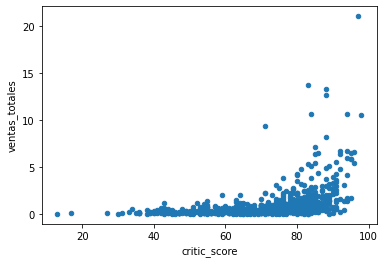

In [20]:
filter_game=data_video.query("platform=='PS3'and critic_score!=999")
correlation=filter_game.corr()
print(correlation)
corre_sales=correlation.loc['critic_score','ventas_totales']
print(corre_sales)
filter_game.plot(x='critic_score', y='ventas_totales', kind='scatter')
plt.show()


Explicacion: Se verifico la correlacion de PSP3 vs el nivel de ventas, se determina que a medida que las plataformas tengan mayores puntajes las ventas crecen proporcionalmente.

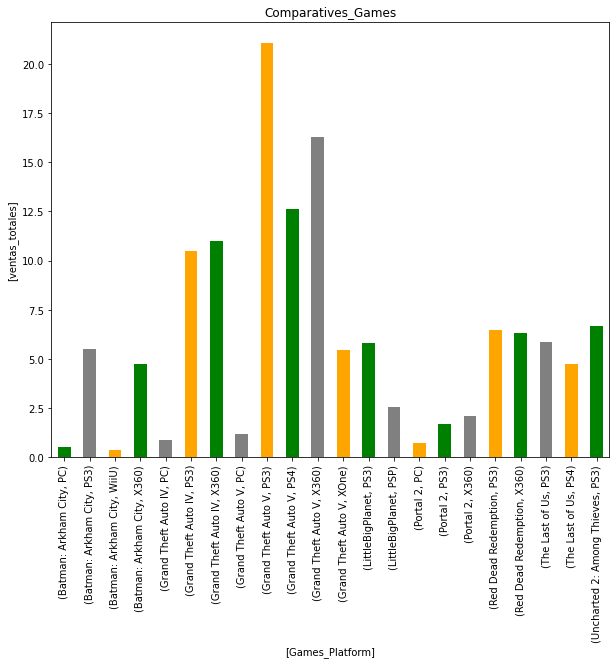

In [136]:
filter_game=data_video.query("platform=='PS3'")
critic_sales=filter_game.query('critic_score>=95 and critic_score!=999')
filter_critic_sales=critic_sales.groupby(['name','platform','critic_score'])['ventas_totales'].sum()
filter_critic_sales=filter_critic_sales.reset_index()
comparative_game=data_video.merge(filter_critic_sales,on='name',how='right')
comparative_plataform_game=comparative_game.groupby(['name','platform_x'])['ventas_totales_x'].sum()
comparative_plataform_game.plot(kind='bar',x=['name','platform_x'],y=['ventas_totales_x'],figsize=[10,8],xlabel=['Games_Platform'],title='Comparatives_Games',color=['green','gray','orange'],ylabel=["ventas_totales"])
plt.show()



Explicacion:Se hace una compracion de las ventas en las diferentes plataformas para los juegos conmejor calificacion en PS3

In [137]:
games_genre=data_video.groupby(['genre'])['ventas_totales'].sum()
filter_game_genre=games_genre.reset_index()
sales_game_genre=filter_game_genre.sort_values(by='ventas_totales',ascending=False)
print(sales_game_genre.reset_index(drop=True))

           genre  ventas_totales
0         Action         1744.17
1         Sports         1331.27
2        Shooter         1052.45
3   Role-Playing          934.56
4       Platform          827.77
5           Misc          802.51
6         Racing          728.67
7       Fighting          447.53
8     Simulation          389.97
9         Puzzle          242.57
10     Adventure          237.59
11      Strategy          174.23
12        uknown            2.42


Explicacion:Se analizan cuales son los generos con mayores ventas, el de accion es el mas vendido

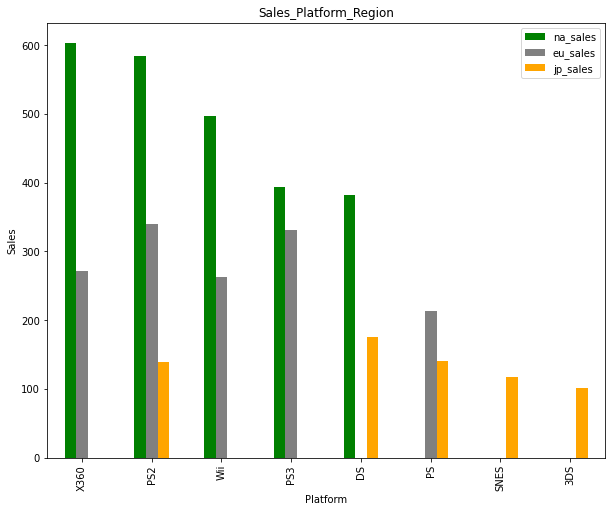

In [138]:
region_platform_na=data_video.groupby('platform')
sales_region_na={'na_sales':'sum'}
sales_region_platform_na=region_platform_na.agg(sales_region_na)
sales_region_platform_na=sales_region_platform_na.reset_index()
sales_region_platform_na=sales_region_platform_na.sort_values(by='na_sales',ascending=False)
sales_region_platform_na=sales_region_platform_na.reset_index(drop=True)
principales_platform_na=sales_region_platform_na.iloc[0:5]
region_platform_eu=data_video.groupby('platform')
sales_region_eu={'eu_sales':'sum'}
sales_region_platform_eu=region_platform_eu.agg(sales_region_eu)
sales_region_platform_eu=sales_region_platform_eu.reset_index()
sales_region_platform_eu=sales_region_platform_eu.sort_values(by='eu_sales',ascending=False)
sales_region_platform_eu=sales_region_platform_eu.reset_index(drop=True)
principales_platform_eu=sales_region_platform_eu.iloc[0:5]
region_platform_jp=data_video.groupby('platform')
sales_region_jp={'jp_sales':'sum'}
sales_region_platform_jp=region_platform_jp.agg(sales_region_jp)
sales_region_platform_jp=sales_region_platform_jp.reset_index()
sales_region_platform_jp=sales_region_platform_jp.sort_values(by='jp_sales',ascending=False)
sales_region_platform_jp=sales_region_platform_jp.reset_index(drop=True)
principales_platform_jp=sales_region_platform_jp.iloc[0:5]
platform_sales_principales=pd.merge(principales_platform_na,principales_platform_eu,on='platform',how='outer')
platform_principales_region=pd.merge(platform_sales_principales,principales_platform_jp,on='platform',how='outer')

platform_principales_region.plot(kind='bar',x='platform',y=['na_sales','eu_sales','jp_sales'],figsize=[10,8],title='Sales_Platform_Region',xlabel='Platform',ylabel='Sales',color=['green','gray','orange'])
plt.show()


Explicacion:Se analizan las plataformas mas vendidas en cada region y se grafica un comparativo

In [139]:
print(platform_principales_region.corr())


          na_sales  eu_sales  jp_sales
na_sales  1.000000 -0.250839      -1.0
eu_sales -0.250839  1.000000      -1.0
jp_sales -1.000000 -1.000000       1.0


Explicacion:el comportamiento de las ventas es diferente en cada region, no presenta correlacion

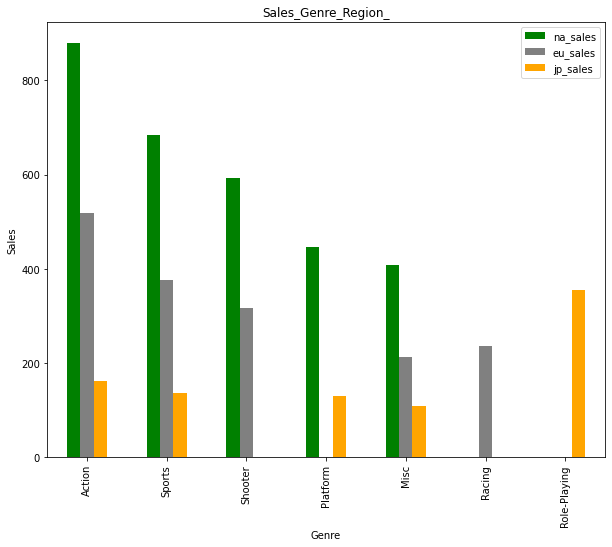

In [140]:
region_genre_na=data_video.groupby('genre')
sales_genre_na={'na_sales':'sum'}
sales_genre_platform_na=region_genre_na.agg(sales_genre_na)
sales_genre_platform_na=sales_genre_platform_na.reset_index()
sales_genre_platform_na=sales_genre_platform_na.sort_values(by='na_sales',ascending=False)
sales_genre_platform_na=sales_genre_platform_na.reset_index(drop=True)
principales_genre_na=sales_genre_platform_na.iloc[0:5]
region_genre_eu=data_video.groupby('genre')
sales_genre_eu={'eu_sales':'sum'}
sales_genre_platform_eu=region_genre_eu.agg(sales_genre_eu)
sales_genre_platform_eu=sales_genre_platform_eu.reset_index()
sales_genre_platform_eu=sales_genre_platform_eu.sort_values(by='eu_sales',ascending=False)
sales_genre_platform_eu=sales_genre_platform_eu.reset_index(drop=True)
principales_genre_eu=sales_genre_platform_eu.iloc[0:5]
region_genre_jp=data_video.groupby('genre')
sales_genre_jp={'jp_sales':'sum'}
sales_genre_platform_jp=region_genre_jp.agg(sales_genre_jp)
sales_genre_platform_jp=sales_genre_platform_jp.reset_index()
sales_genre_platform_jp=sales_genre_platform_jp.sort_values(by='jp_sales',ascending=False)
sales_genre_platform_jp=sales_genre_platform_jp.reset_index(drop=True)
principales_genre_jp=sales_genre_platform_jp.iloc[0:5]
genre_sales_principales=pd.merge(principales_genre_na,principales_genre_eu,on='genre',how='outer')
genre_principales_region=pd.merge(genre_sales_principales,principales_genre_jp,on='genre',how='outer')

genre_principales_region.plot(kind='bar',x='genre',y=['na_sales','eu_sales','jp_sales'],figsize=[10,8],title='Sales_Genre_Region_',xlabel='Genre',ylabel='Sales',color=['green','gray','orange'])
plt.show()



Explicacion:Se obtienes los generos mas vendidos por region.

In [141]:
clasification_sales_na=data_video.groupby(['rating'])['na_sales'].sum()
clasification_sales_na=clasification_sales_na.reset_index()
clasification_sales_eu=data_video.groupby(['rating'])['eu_sales'].sum()
clasification_sales_eu=clasification_sales_eu.reset_index()
clasification_sales_jp=data_video.groupby(['rating'])['jp_sales'].sum()
clasification_sales_jp=clasification_sales_jp.reset_index()
clasification_sales_principales=pd.merge(clasification_sales_na,clasification_sales_eu,on='rating',how='outer')
clasification_principales_region=pd.merge(clasification_sales_principales,clasification_sales_jp,on='rating',how='outer')
print(clasification_principales_region)


   rating  na_sales  eu_sales  jp_sales
0      AO      1.26      0.61      0.00
1       E   1292.99    710.25    198.11
2    E10+    353.32    188.52     40.20
3      EC      1.53      0.11      0.00
4     K-A      2.56      0.27      1.46
5       M    748.48    483.97     64.24
6      RP      0.00      0.08      0.00
7       T    759.75    427.03    151.40
8  uknown   1242.46    613.83    841.96


Explicacion:La calificacion tiene correlacion en el nivel de ventas

In [142]:
platform_qualify_xbox=data_video.query("platform=='XOne' and critic_score>=1 and critic_score!=999")
platform_qualify_pc=data_video.query("platform=='PC' and critic_score>=1 and critic_score!=999")
alpha=0.05


result=st.ttest_ind(platform_qualify_xbox['critic_score'],platform_qualify_pc['critic_score'],equal_var=False)
print('valor p:',result.pvalue)

if (result.pvalue<alpha):
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')



valor p: 0.01676445953904435
Rechazamos la hipótesis nula


Se rechaza la hipotesis nula lo que signifa que la calificacion para XOne y PC no son iguales

Conclusion general: Con este analisis pudimos determinar las plataformas mas vendidas,la vigencia de las plataformas, las diferentes ventas por regiones, se pueden llevar a cabo analisis de cuales plataformas se deben vender en cada region, cuales son los generos que mas se venden, lo que podria impactar en las campanasde marketing.